In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
from helper import *
from scipy.stats.mstats import gmean
#Importation of all the packages
from datetime import datetime
import math
import json
import zipfile  
import ssl
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics

#To dowload data
import requests
import io
import gzip

#To create the mapchart
import iso3166
import plotly
from iso3166 import countries
import plotly.graph_objects as go

In [36]:
pageview_df = pd.read_csv("page_views_covid_related.csv.gz")
pageview_df_imp_country = pageview_df[["date"] + list(get_country_dict().values())].set_index('date')
pageview_df_imp_country.head()
country_dict = get_country_dict()
inv_country_dict = {v: k for k, v in country_dict.items()}

In [37]:
#Normalisation different Mean/Max;Min; Correlation pageviews avec covid cases

#Population per country
#Population per languages


In [38]:
ssl._create_default_https_context = ssl._create_unverified_context
death_url = "https://github.com/owid/covid-19-data/blob/master/public/data/jhu/new_deaths.csv?raw=true" # Make sure the url is the raw version of the file on GitHub
cases_url = "https://github.com/owid/covid-19-data/blob/master/public/data/jhu/new_cases.csv?raw=true"

# Reading the downloaded content and turning it into a pandas dataframe
deaths = pd.read_csv(death_url,index_col=0)
cases = pd.read_csv(cases_url,index_col=0)
deaths= deaths.interpolate(method ='linear', limit_direction ='forward') 
cases = cases.interpolate(method ='linear', limit_direction ='forward') 
deaths = deaths.fillna(0)
cases = cases.fillna(0)
#Keep only values until July
deaths = deaths[deaths.index < '2020-08-31']
cases = cases[cases.index < '2020-08-31']


In [39]:
df_pageviews_pearson = pageview_df_imp_country.loc[pageview_df_imp_country.index < '2020-08-31']
df_pageviews_pearson = df_pageviews_pearson.loc[df_pageviews_pearson.index >= '2020-01-22']
df_pageviews_pearson = df_pageviews_pearson.interpolate(method ='linear', limit_direction ='forward') 
df_pageviews_pearson = df_pageviews_pearson.fillna(0)

In [40]:
pearson_deaths = pd.DataFrame({"Pearson correlation":["Correlation coefficient:","P-value:"]})

for country in country_dict.items():
    corr, p_value = stats.pearsonr(df_pageviews_pearson[country[1]], deaths[country[0]])
    output_df = pd.DataFrame({str(country[0]):[corr, p_value] })
    pearson_deaths = pd.concat([pearson_deaths, output_df], axis=1)
pearson_deaths

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



,Pearson correlation,Italy,Russia,China,Albania,Bangladesh,Botswana,Cambodia,Croatia,Greece,...,Kazakhstan,South Korea,Kyrgyzstan,Netherlands,Poland,Romania,Tajikistan,Thailand,Azerbaijan,Mongolia
0,Correlation coefficient:,7.649793e-01,-5.879579e-01,0.089888,-0.075668,-0.160419,0.189628,NaN,0.024396,3.650353e-01,...,-0.120604,4.765756e-01,0.069496,4.767521e-01,-0.258035,-0.241334,0.291979,0.214635,-0.163240,NaN
1,P-value:,6.430361e-44,4.933171e-22,0.182060,0.261574,0.016748,0.004579,NaN,0.717731,2.109927e-08,...,0.072913,5.466895e-14,0.302601,5.335652e-14,0.000101,0.000284,0.000010,0.001293,0.014898,NaN


In [41]:
pearson_cases = pd.DataFrame({"Pearson correlation":["Correlation coefficient:","P-value:"]})

for country in country_dict.items():
    corr, p_value = stats.pearsonr(df_pageviews_pearson[country[1]], cases[country[0]])
    output_df = pd.DataFrame({str(country[0]):[corr, p_value] })
    pearson_cases = pd.concat([pearson_cases, output_df], axis=1)
pearson_cases

,Pearson correlation,Italy,Russia,China,Albania,Bangladesh,Botswana,Cambodia,Croatia,Greece,...,Kazakhstan,South Korea,Kyrgyzstan,Netherlands,Poland,Romania,Tajikistan,Thailand,Azerbaijan,Mongolia
0,Correlation coefficient:,8.405926e-01,-5.115834e-01,0.004844,-0.084170,-0.147660,3.314176e-01,0.249994,-0.024175,0.090575,...,-0.202300,-0.078737,0.083035,4.956838e-01,-4.192132e-01,-0.254933,4.181667e-01,5.312515e-01,-0.135019,0.006728
1,P-value:,1.683168e-60,3.314676e-16,0.942788,0.211578,0.027825,4.333591e-07,0.000167,0.720177,0.178728,...,0.002457,0.242669,0.217823,3.621734e-15,7.347582e-11,0.000123,8.278287e-11,1.440780e-17,0.044475,0.920593


In [42]:
pearson_cases_Kmeans = pearson_cases.rename(columns= country_dict).loc[0]
pearson_deaths_Kmeans = pearson_deaths.rename(columns= country_dict).loc[0]

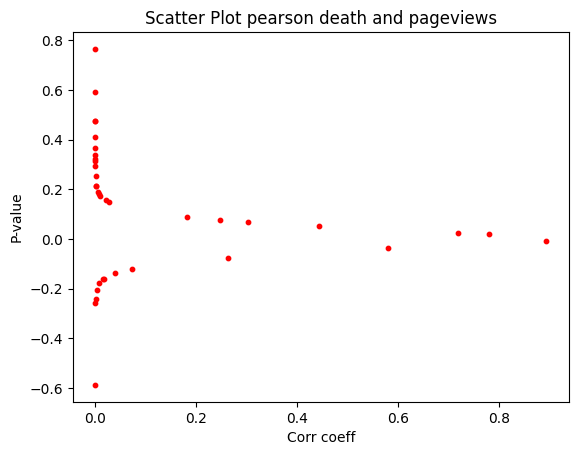

In [43]:
# create a new figure
plt.figure()

# use the scatter() function to plot the points,
# with red circles of size 10
plt.scatter(pearson_deaths.loc[1][1:], pearson_deaths.loc[0][1:], color="red", s=10)

# add a title
plt.title("Scatter Plot pearson death and pageviews")

# add x and y axis labels
plt.xlabel("Corr coeff")
plt.ylabel("P-value")

# show the plot
plt.show()

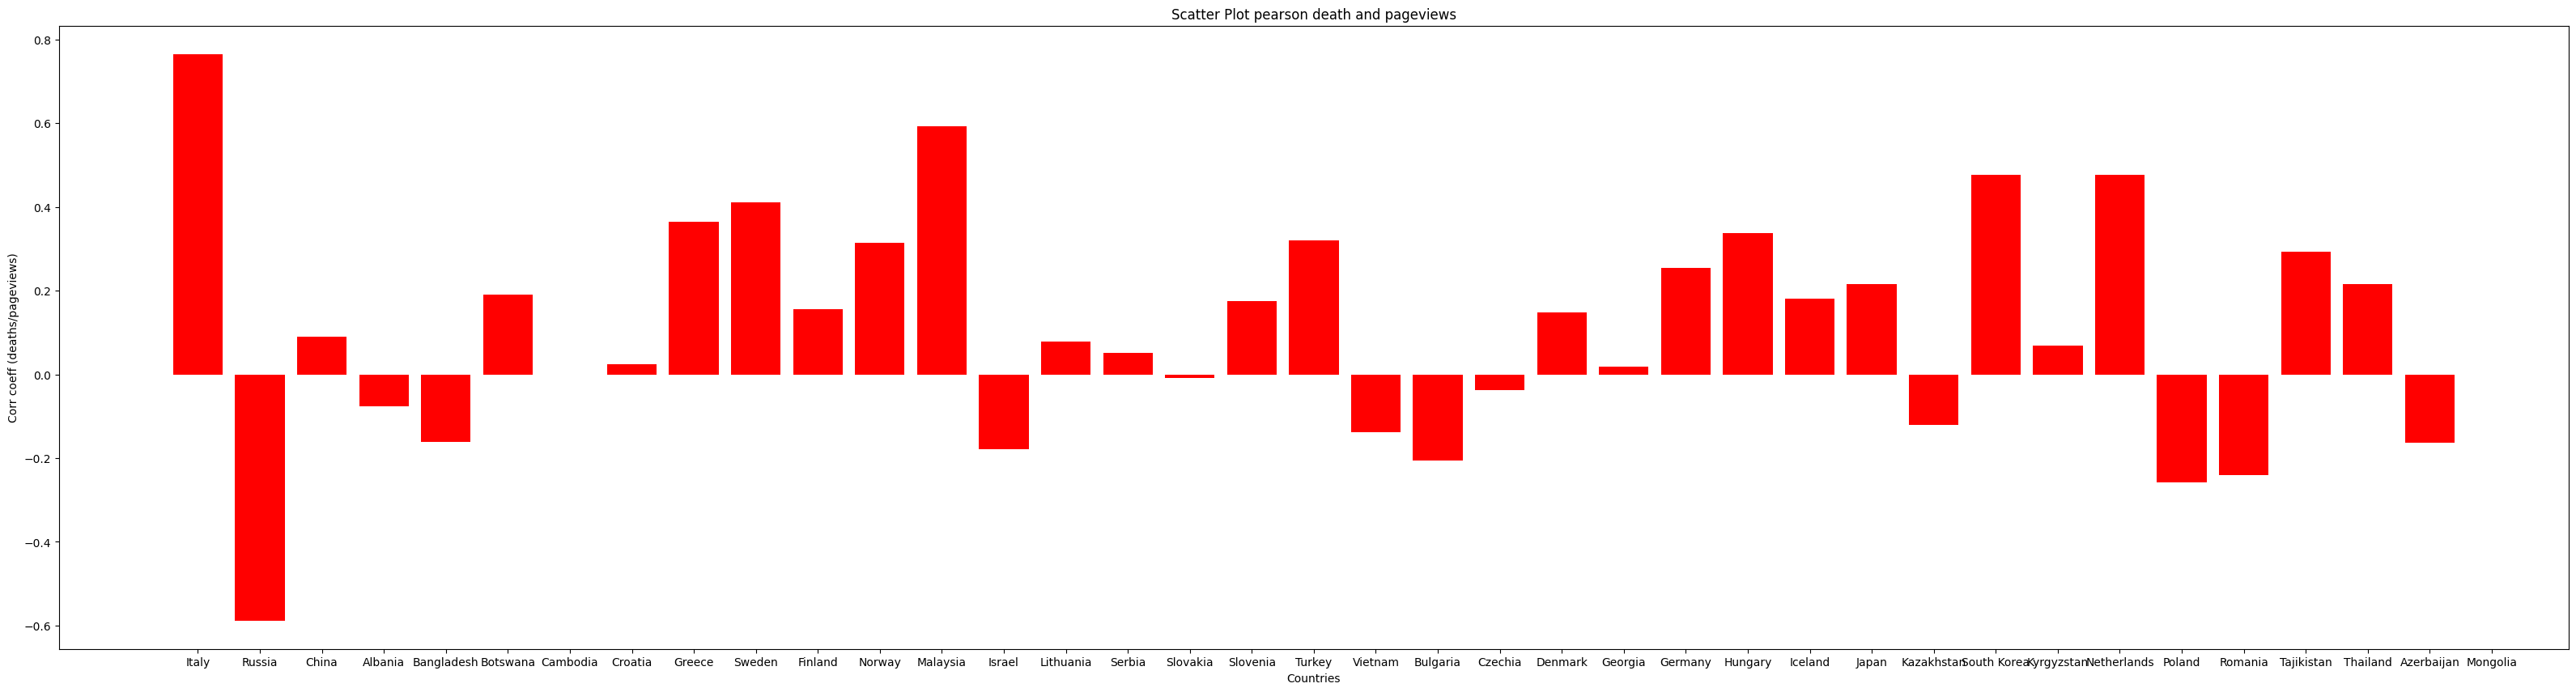

In [44]:
pearson_deathsT = pearson_deaths.transpose()
pearson_deathsT = pearson_deathsT.drop(index= 'Pearson correlation', axis=0)
pearson_deathsT = pearson_deathsT.rename(columns= {0: 'Correlation coefficient', 1: 'P-value'})
# create a new figure
plt.figure(figsize=(40, 10))

# use the scatter() function to plot the points,
# with red circles of size 10
plt.bar(pearson_deathsT.index.values, pearson_deathsT['Correlation coefficient'].values, color="red")

# add a title
plt.title("Scatter Plot pearson death and pageviews")

# add x and y axis labels
plt.xlabel("Countries")
plt.ylabel("Corr coeff (deaths/pageviews)")

# show the plot
plt.show()

### Loading population by countries

In [45]:
COUNTRY_OWN_LANG_POP = {"Italy" : "it", "Russian Federation": "ru", "China": "zh", "Albania": "sq", 
 "Bangladesh": "bn", "Botswana": "tn", "Cambodia": "km", "Croatia": "hr", "Greece": "el", "Sweden": "sv", "Finland": "fi", "Norway": "no",
 "Malaysia": "ms", "Israel": "he", "Lithuania": "lt", "Serbia": "sr", "Slovak Republic": "sk", "Slovenia": "sl", "Turkiye": "tr",
 "Vietnam": "vi", "Bulgaria": "bg", "Czechia": "cs", "Denmark": "da", "Georgia": "ka", "Germany": "de", 
 "Hungary": "hu", "Iceland": "is", "Japan": "ja", "Kazakhstan": "kk", "Korea, Rep.": "ko", "Kyrgyz Republic": 'ky', "Netherlands": "nl", "Poland": "pl", 
 "Romania": "ro", "Tajikistan": "tg", "Thailand": "th", "Azerbaijan": "az", "Mongolia": "mn"}

#changed_name_countries = {"Russian Federation": "Russia", "Slovak Republic": "Slovakia", "Turkiye": "Turkey",
# "Korea, Rep.": "South Korea", "Kyrgyz Republic": 'Kyrgyzstan'}

population_df = pd.read_csv("Population_countries.csv")
population_df = population_df[["Country Name", "2020"]]
population_df = population_df.set_index("Country Name")
population_df = population_df.transpose()
population_df = population_df[list(COUNTRY_OWN_LANG_POP.keys())]
population_df = population_df.rename(columns= COUNTRY_OWN_LANG_POP)
population_df = population_df.transpose()
population_df.head()

,2020
Country Name,
it,5.944953e+07
ru,1.440731e+08
zh,1.411100e+09
sq,2.837849e+06
bn,1.646894e+08


## Check different metrics for pageviews, death and cases

### 1. Pageviews

In [46]:

pageviews_amean = (df_pageviews_pearson.mean()/population_df['2020']) * 100000
pageviews_max = (df_pageviews_pearson.max()/population_df['2020']) * 100000
pageviews_min = (df_pageviews_pearson.min()/population_df['2020']) * 100000


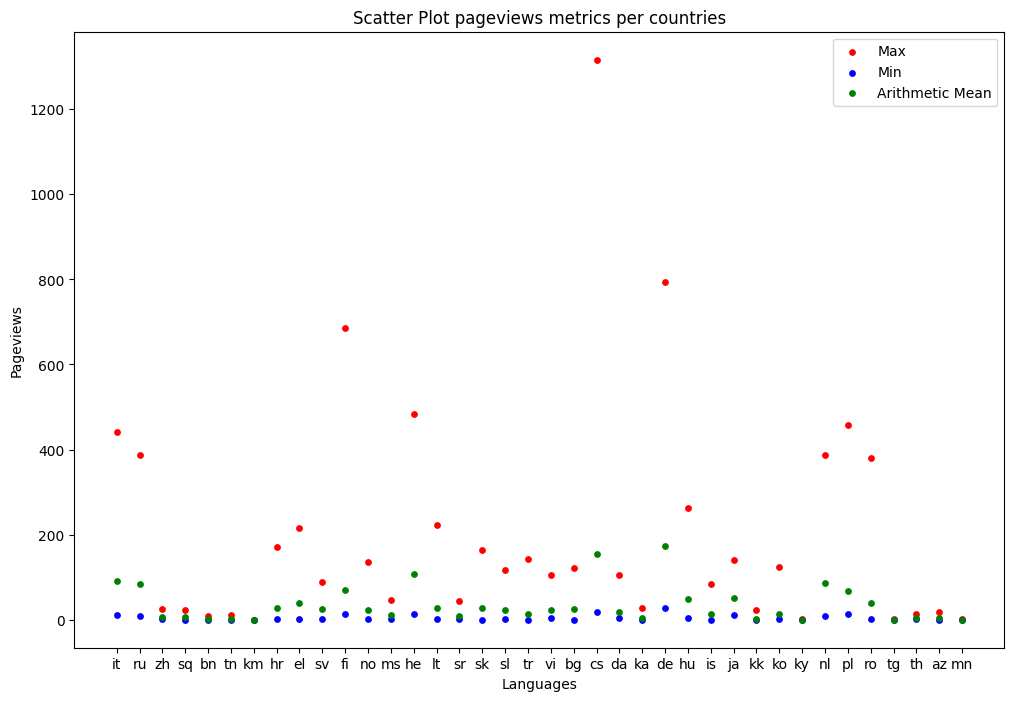

In [47]:

# create a new figure
plt.figure(figsize=(12, 8))
# use the scatter() function to plot the points,
# with red circles of size 10
plt.scatter(pageviews_max.index, pageviews_max.values, color="red", s= 15)
plt.scatter(pageviews_min.index, pageviews_min.values, color="blue", s= 15)
plt.scatter(pageviews_amean.index, pageviews_amean.values, color="green", s= 15)
# add a title
plt.title("Scatter Plot pageviews metrics per countries")

# add x and y axis labels
plt.xlabel("Languages")
plt.ylabel("Pageviews")
plt.legend(["Max", "Min", "Arithmetic Mean"])

# show the plot
plt.show()

### 1. Covid-19 dataset
We have to select the variable between covid cases and covid deaths that create the most variability between the countries. Moreover, we also have to choose a represenative metric such as mean, min or max. 

Let's first plot the covid deaths for all the countries per 100 000 people, looking at the mean,min,max. 

In [48]:
deaths_lang_code = deaths.rename(columns= country_dict)[country_dict.values()]
deaths_amean = (deaths_lang_code.mean()/population_df['2020']) * 100000
deaths_max = (deaths_lang_code.max()/population_df['2020']) * 100000
deaths_min = (deaths_lang_code.min()/population_df['2020']) * 100000


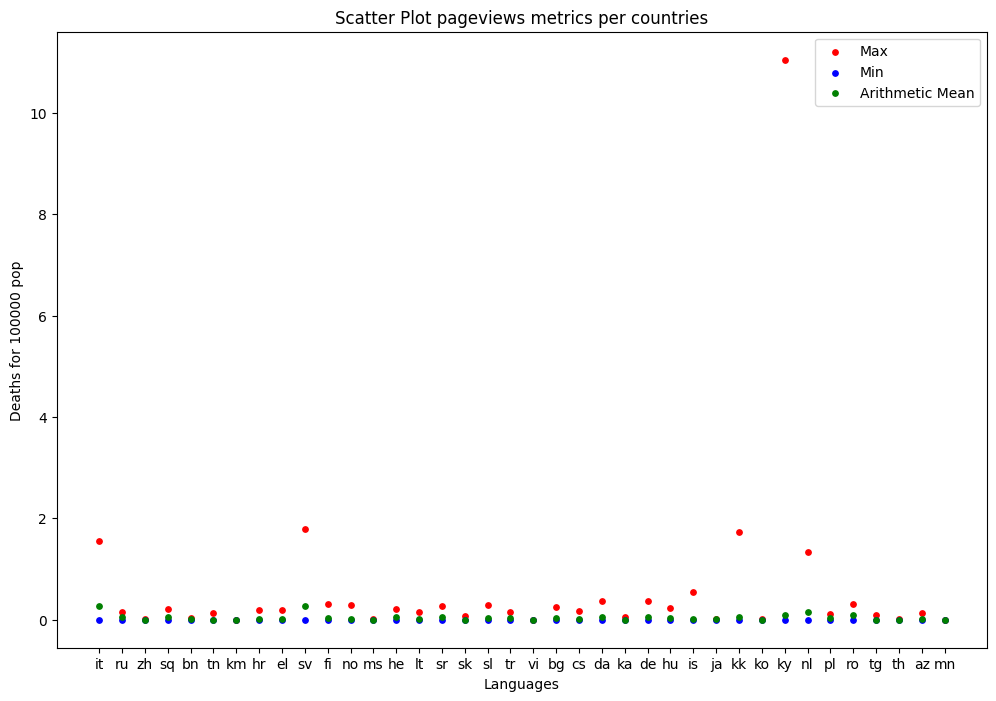

In [49]:
# create a new figure
plt.figure(figsize=(12, 8))
# use the scatter() function to plot the points,
# with red circles of size 10
plt.scatter(deaths_max.index, deaths_max.values, color="red", s= 15)
plt.scatter(deaths_min.index, deaths_min.values, color="blue", s= 15)
plt.scatter(deaths_amean.index, deaths_amean.values, color="green", s= 15)
# add a title
plt.title("Scatter Plot pageviews metrics per countries")

# add x and y axis labels
plt.xlabel("Languages")
plt.ylabel("Deaths for 100000 pop")
plt.legend(["Max", "Min", "Arithmetic Mean"])

# show the plot
plt.show()


Now, let's look at covid cases for 100 000 people per country

In [50]:
cases_lang_code = cases.rename(columns= country_dict)[country_dict.values()]
cases_amean = (cases_lang_code.mean()/population_df['2020']) * 100000
cases_max = (cases_lang_code.max()/population_df['2020']) * 100000
cases_min = (cases_lang_code.min()/population_df['2020']) * 100000

Looking at both plots, we see that the max value gives much more variance between the countries than mean or min, therefore this metric is chosen for the clustering. Moreover, we also see that covid cases also shows more variance than covid deaths between the countries, therefore the max of covid cases is chosen for the clustering of countries. 

In [51]:
data_folder = 'data_2/'
df_trust_gov = pd.read_csv(data_folder+'share-who-trust-government.csv.zip') 
df_trust_science = pd.read_csv(data_folder+'share-people-trust-science.csv.zip')
df_trust_journalists = pd.read_csv(data_folder+'share-people-trust-journalists-country.csv.zip')


In [52]:
COUNTRY_OWN_LANG_TRUST_JOURN = {"Italy" : "it", "Russia": "ru", "China": "zh", "Albania": "sq", 
"Bangladesh": "bn", "Cambodia": "km", "Croatia": "hr", "Greece": "el", "Sweden": "sv", "Finland": "fi", "Norway": "no",
 "Malaysia": "ms", "Israel": "he", "Lithuania": "lt", "Serbia": "sr", "Slovakia": "sk", "Slovenia": "sl", "Turkey": "tr",
 "Vietnam": "vi", "Bulgaria": "bg", "Czechia": "cs", "Denmark": "da", "Georgia": "ka", "Germany": "de", 
 "Hungary": "hu", "Japan": "ja", "Kazakhstan": "kk", "South Korea": "ko", "Kyrgyzstan": 'ky', "Netherlands": "nl", "Poland": "pl", 
 "Romania": "ro", "Tajikistan": "tg", "Thailand": "th", "Mongolia": "mn"}

COUNTRY_OWN_LANG_TRUST_GOV = {"Italy" : "it", "Russia": "ru", "Albania": "sq", 
"Bangladesh": "bn", "Cambodia": "km", "Croatia": "hr", "Greece": "el", "Sweden": "sv", "Finland": "fi", "Norway": "no",
 "Malaysia": "ms", "Israel": "he", "Lithuania": "lt", "Serbia": "sr", "Slovakia": "sk", "Slovenia": "sl", "Turkey": "tr", "Bulgaria": "bg", "Czechia": "cs", "Denmark": "da", "Georgia": "ka", "Germany": "de", 
 "Hungary": "hu", "Japan": "ja", "Kazakhstan": "kk", "South Korea": "ko", "Kyrgyzstan": 'ky', "Netherlands": "nl", "Poland": "pl", 
 "Romania": "ro", "Thailand": "th", "Mongolia": "mn"}


df_trust_journalists = df_trust_journalists.set_index("Entity")[["Trust journalists in this country"]].transpose()[COUNTRY_OWN_LANG_TRUST_JOURN.keys()].rename(columns= COUNTRY_OWN_LANG_TRUST_JOURN)
df_trust_gov = df_trust_gov.set_index("Entity")[["Trust the national government in this country"]].transpose()[COUNTRY_OWN_LANG_TRUST_GOV.keys()].rename(columns= COUNTRY_OWN_LANG_TRUST_GOV)
df_trust_gov.head()

Entity,it,ru,sq,bn,km,hr,el,sv,fi,no,...,hu,ja,kk,ko,ky,nl,pl,ro,th,mn
Trust the national government in this country,52.3,47.0,41.4,83.0,83.8,42.0,40.7,64.7,80.7,94.3,...,48.6,49.5,72.2,52.8,57.6,78.5,33.6,24.3,55.6,54.8


In [53]:

#df_clustering_J_C_P = pd.concat([pageviews_amean.to_frame().rename(columns= {0: 'Max pageview'}).transpose(), cases_amean.to_frame().rename(columns= {0: 'Max cases'}).transpose()], axis= 0)
#df_clustering_J_C_P = pd.concat([pageviews_max.to_frame().rename(columns= {0: 'Max pageview'}).transpose(), cases_max.to_frame().rename(columns= {0: 'Max cases'}).transpose()], axis= 0)

#df_clustering_J_C_P = df_clustering_J_C_P.transpose().dropna()
#df_clustering_J_C_P

In [54]:
# import hdbscan
# clusterer = hdbscan.HDBSCAN(algorithm='best', approx_min_span_tree=True, metric= 'chebyshev')
# clusterer.fit(DF_ARRAY)

# # px.scatter_3d(x=umap_data[:,0], y=umap_data[:,1], z=umap_data[:,2], color=clusterer.labels_.astype(str), title="UMAP => HDBSCAN")
# df_clustering_J_C_P['cluster'] = clusterer.labels_

# Clustering
### Max pageviews/ Max cases/ Trust Journ

In [55]:
df_clustering_MP_MC_J = pd.concat([pageviews_max.to_frame().rename(columns= {0: 'Max pageview'}).transpose(), cases_max.to_frame().rename(columns= {0: 'Max cases'}).transpose(), df_trust_journalists], axis= 0)
df_clustering_MP_MC_J = df_clustering_MP_MC_J.transpose().dropna()

#quantile filter: discard 1% upper / lower values (robust option of removing outliers)
lim = np.logical_and(df_clustering_MP_MC_J < df_clustering_MP_MC_J.quantile(0.99, numeric_only=False),
                     df_clustering_MP_MC_J > df_clustering_MP_MC_J.quantile(0.01, numeric_only=False))

# replace outliers with nan
df_clustering_MP_MC_J= df_clustering_MP_MC_J.where(lim, np.nan).dropna()

# df_clustering_MP_MC_J = df_clustering_MP_MC_J.loc[df_clustering_MP_MC_J['Max cases'] <= 100]
# Create dataframe for clustering with covid max cases, pageviews max, and trust in journalists

# Preprocessing the data
df_array = np.array(df_clustering_MP_MC_J.iloc[:,:])          # Getting only the numeric features from the dataset
df_norm  = preprocessing.normalize(df_array) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 6)

# Training our model
kmeans.fit(df_norm)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_MP_MC_J['cluster'] = kmeans.labels_

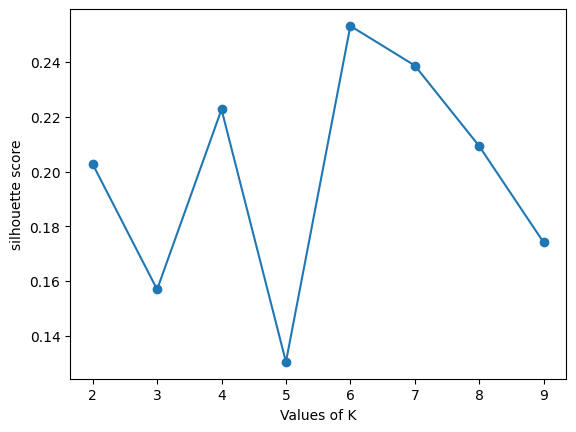

In [56]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(df_norm)
    
    results.append(metrics.silhouette_score(df_array ,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

In [57]:
PLOT = go.Figure()

for C in list(df_clustering_MP_MC_J.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_clustering_MP_MC_J[df_clustering_MP_MC_J.cluster == C]["Trust journalists in this country"],
                                y = df_clustering_MP_MC_J[df_clustering_MP_MC_J.cluster == C]['Max pageview'],
                                z = df_clustering_MP_MC_J[df_clustering_MP_MC_J.cluster == C]['Max cases'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Trust journalists in this country', titlefont_color = 'black'),
                                yaxis=dict(title = 'Max pageview', titlefont_color = 'black'),
                                zaxis=dict(title = 'Max cases', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [59]:
df_clustering_MP_MC_J['cluster'].to_frame().rename(index= inv_country_dict).head(40)

,cluster
Italy,0
Russia,0
China,4
Albania,4
Bangladesh,1
Croatia,2
Sweden,5
Finland,0
Malaysia,5
Israel,0


## Clustering Pearson cases/trust government

In [84]:
df_clustering_Pears__G = pd.concat([pearson_cases_Kmeans.to_frame().rename(columns= {0: 'Pearsons cases'}).transpose(), df_trust_gov], axis= 0)
df_clustering_Pears__G = df_clustering_Pears__G.transpose().dropna()
# Create dataframe for clustering with covid max cases, pageviews max, and trust in journalists
#lim = np.logical_and(df_clustering_Pears__G  < df_clustering_Pears__G .quantile(0.99, numeric_only=False),
#                     df_clustering_Pears__G  > df_clustering_Pears__G .quantile(0.01, numeric_only=False))

# replace outliers with nan
#df_clustering_Pears__G  = df_clustering_Pears__G .where(lim, np.nan).dropna()

# Preprocessing the data
df_array = np.array(df_clustering_Pears__G.iloc[:,:])          # Getting only the numeric features from the dataset
df_norm  = preprocessing.normalize(df_array) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 2)

# Training our model
kmeans.fit(df_norm)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_Pears__G['cluster'] = kmeans.labels_

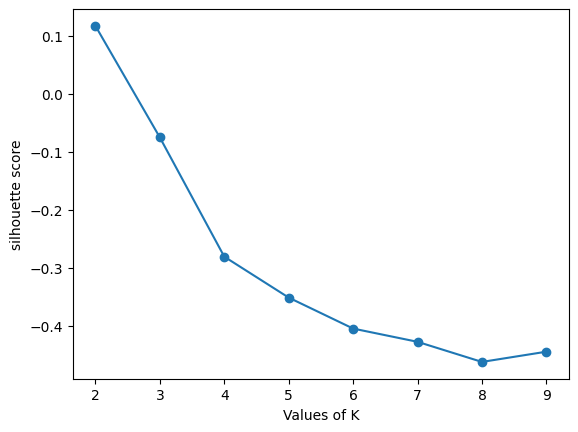

In [85]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(df_norm)
    
    results.append(metrics.silhouette_score(df_array ,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

In [91]:
df_clustering_Pears__G['cluster'].to_frame().rename(index= inv_country_dict).head(40)

,cluster
Italy,0
Russia,1
Albania,1
Bangladesh,1
Cambodia,0
Croatia,1
Greece,0
Sweden,0
Finland,0
Norway,0


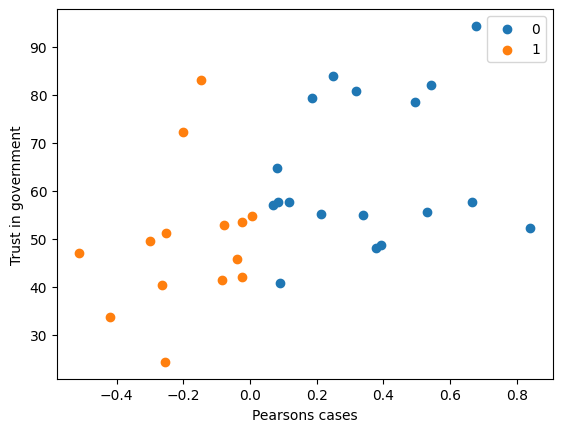

In [86]:
#plot 2d
for i in list(df_clustering_Pears__G.cluster.unique()):
    plt.scatter(df_clustering_Pears__G[df_clustering_Pears__G.cluster == i]["Pearsons cases"], df_clustering_Pears__G[df_clustering_Pears__G.cluster == i]["Trust the national government in this country"], label = i)
plt.xlabel("Pearsons cases")
plt.ylabel("Trust in government")
plt.legend()
plt.show()

## Clustering Pearson cases/Journalists

In [89]:
df_clustering_Pears__J = pd.concat([pearson_cases_Kmeans.to_frame().rename(columns= {0: 'Pearsons cases'}).transpose(), df_trust_journalists], axis= 0)
df_clustering_Pears__J = df_clustering_Pears__J.transpose().dropna()
# Create dataframe for clustering with covid max cases, pageviews max, and trust in journalists
#lim = np.logical_and(df_clustering_Pears__G  < df_clustering_Pears__G .quantile(0.99, numeric_only=False),
#                     df_clustering_Pears__G  > df_clustering_Pears__G .quantile(0.01, numeric_only=False))

# replace outliers with nan
#df_clustering_Pears__G  = df_clustering_Pears__G .where(lim, np.nan).dropna()

# Preprocessing the data
df_array = np.array(df_clustering_Pears__J.iloc[:,:])          # Getting only the numeric features from the dataset
df_norm  = preprocessing.normalize(df_array) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 2)

# Training our model
kmeans.fit(df_norm)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_Pears__J['cluster'] = kmeans.labels_

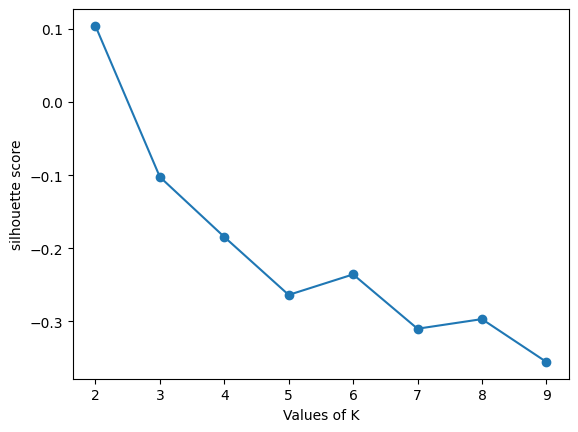

In [64]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(df_norm)
    
    results.append(metrics.silhouette_score(df_array ,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

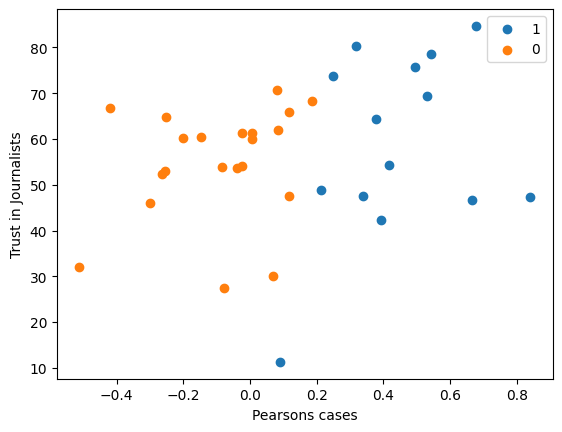

In [90]:
#plot 2d
for i in list(df_clustering_Pears__J.cluster.unique()):
    plt.scatter(df_clustering_Pears__J[df_clustering_Pears__J.cluster == i]["Pearsons cases"], df_clustering_Pears__J[df_clustering_Pears__J.cluster == i]["Trust journalists in this country"], label = i)
plt.xlabel("Pearsons cases")
plt.ylabel("Trust in Journalists")
plt.legend()
plt.show()

## Clustering Max pageviews/Max cases/ trust government

In [66]:
df_clustering_MP_MC_G = pd.concat([pageviews_max.to_frame().rename(columns= {0: 'Max pageview'}).transpose(), cases_max.to_frame().rename(columns= {0: 'Max cases'}).transpose(), df_trust_gov], axis= 0)
df_clustering_MP_MC_G= df_clustering_MP_MC_G.transpose().dropna()

#drop outliers
# Create dataframe for clustering with covid max cases, pageviews max, and trust in journalists
lim = np.logical_and(df_clustering_MP_MC_G   < df_clustering_MP_MC_G.quantile(0.99, numeric_only=False),
                    df_clustering_MP_MC_G  > df_clustering_MP_MC_G.quantile(0.01, numeric_only=False))

# replace outliers with nan
df_clustering_MP_MC_G   = df_clustering_MP_MC_G .where(lim, np.nan).dropna()
# Create dataframe for clustering with covid max cases, pageviews max, and trust in journalists

# Preprocessing the data
DF_ARRAY = np.array(df_clustering_MP_MC_G.iloc[:,:])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 2)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_MP_MC_G['cluster'] = kmeans.labels_




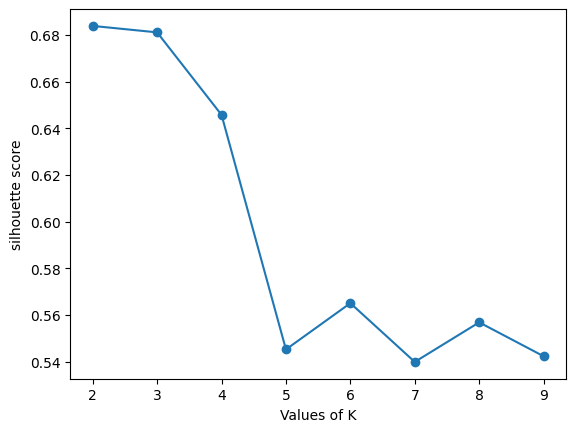

In [67]:
# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(metrics.silhouette_score(DF_NORM, model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

In [68]:
PLOT = go.Figure()

for C in list(df_clustering_MP_MC_G.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_clustering_MP_MC_G[df_clustering_MP_MC_G.cluster == C]["Trust the national government in this country"],
                                y = df_clustering_MP_MC_G[df_clustering_MP_MC_G.cluster == C]['Max pageview'],
                                z = df_clustering_MP_MC_G[df_clustering_MP_MC_G.cluster == C]['Max cases'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Trust gov in this country', titlefont_color = 'black'),
                                yaxis=dict(title = 'Max pageview', titlefont_color = 'black'),
                                zaxis=dict(title = 'Max cases', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

## Clustering Mean pageviews/Mean cases/ trust government

In [92]:
df_clustering_MeanP_MeanC_P = pd.concat([pageviews_amean.to_frame().rename(columns= {0: 'Mean pageview'}).transpose(), cases_amean.to_frame().rename(columns= {0: 'Mean cases'}).transpose(), df_trust_gov], axis= 0)
df_clustering_MeanP_MeanC_P= df_clustering_MeanP_MeanC_P.transpose().dropna()

# Preprocessing the data
DF_ARRAY = np.array(df_clustering_MeanP_MeanC_P.iloc[:,:])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data
# x = df_clustering_MeanP_MeanC_P.values
# DF_NORM  = preprocessing.normalize(x)
# Creating our Model
kmeans = KMeans(n_clusters =5)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_MeanP_MeanC_P ['cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_ 

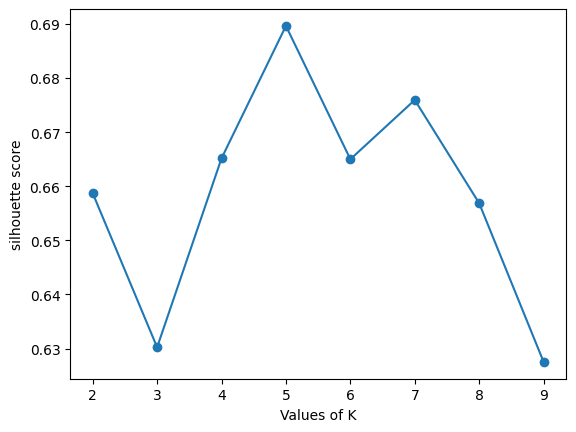

In [93]:

# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(metrics.silhouette_score(DF_NORM,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

In [95]:
df_clustering_MeanP_MeanC_P['cluster'].to_frame().rename(index= inv_country_dict).head(40)

,cluster
Italy,1
Russia,1
Albania,4
Bangladesh,0
Cambodia,0
Croatia,2
Greece,3
Sweden,2
Finland,3
Norway,4


In [94]:
PLOT = go.Figure()

for C in list(df_clustering_MeanP_MeanC_P.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_clustering_MeanP_MeanC_P[df_clustering_MeanP_MeanC_P.cluster == C]["Trust the national government in this country"],
                                y = df_clustering_MeanP_MeanC_P[df_clustering_MeanP_MeanC_P.cluster == C]['Mean pageview'],
                                z = df_clustering_MeanP_MeanC_P[df_clustering_MeanP_MeanC_P.cluster == C]['Mean cases'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Trust gov in this country', titlefont_color = 'black'),
                                yaxis=dict(title = 'Mean pageview', titlefont_color = 'black'),
                                zaxis=dict(title = 'Mean cases', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

## Clustering Mean pageviews/Mean cases/ trust journalists

In [72]:
df_clustering_MeanP_MeanC_J = pd.concat([pageviews_amean.to_frame().rename(columns= {0: 'Mean pageview'}).transpose(), cases_amean.to_frame().rename(columns= {0: 'Mean cases'}).transpose(), df_trust_journalists], axis= 0)
df_clustering_MeanP_MeanC_J= df_clustering_MeanP_MeanC_J.transpose().dropna()

# # OPTION 2: quantile filter: discard 1% upper / lower values (robust option of removing outliers)
# lim = np.logical_and(df_clustering_MeanP_MeanC_J < df_clustering_MeanP_MeanC_J.quantile(0.99, numeric_only=False),
#                      df_clustering_MeanP_MeanC_J > df_clustering_MeanP_MeanC_J.quantile(0.01, numeric_only=False))

# # replace outliers with nan
# df_clustering_MeanP_MeanC_J= df_clustering_MeanP_MeanC_J.where(lim, np.nan).dropna()
# Preprocessing the data
DF_ARRAY = np.array(df_clustering_MeanP_MeanC_J.iloc[:,:])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data

# Creating our Model
kmeans = KMeans(n_clusters = 5)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df_clustering_MeanP_MeanC_J ['cluster'] = kmeans.labels_

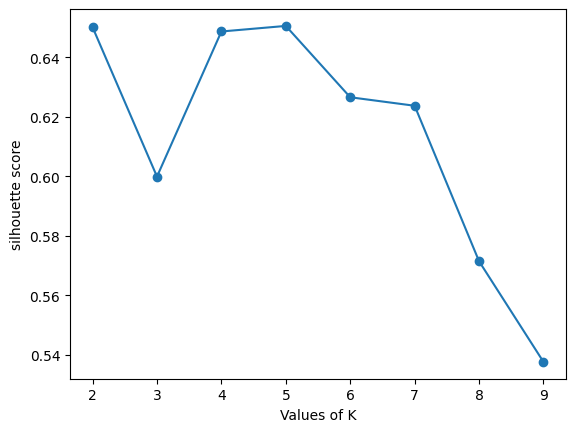

In [73]:

# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(metrics.silhouette_score(DF_NORM,model.labels_))
    
# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("silhouette score")
plt.show()

In [97]:
df_clustering_MeanP_MeanC_P['cluster'].to_frame().rename(index= inv_country_dict).head(40)

,cluster
Italy,1
Russia,1
Albania,4
Bangladesh,0
Cambodia,0
Croatia,2
Greece,3
Sweden,2
Finland,3
Norway,4


In [74]:
PLOT = go.Figure()

for C in list(df_clustering_MeanP_MeanC_P.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_clustering_MeanP_MeanC_J[df_clustering_MeanP_MeanC_J.cluster == C]["Trust journalists in this country"],
                                y = df_clustering_MeanP_MeanC_J[df_clustering_MeanP_MeanC_J.cluster == C]['Mean pageview'],
                                z = df_clustering_MeanP_MeanC_J[df_clustering_MeanP_MeanC_J.cluster == C]['Mean cases'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Trust Journalists in this country', titlefont_color = 'black'),
                                yaxis=dict(title = 'Mean pageview', titlefont_color = 'black'),
                                zaxis=dict(title = 'Mean cases', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [75]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation

# initialize the data set we'll work with
training_data  = preprocessing.normalize(df_clustering_MP_MC_J.values)

# define the model
model = AffinityPropagation(damping=0.6)

# train the model
model.fit(training_data)

# assign each data point to a cluster
result = model.predict(training_data)

df_clustering_MP_MC_J['cluster'] = result

### Feature selection for mobility

In [76]:
data_folder = 'data_2/'

#Download mobility and intervention files
google_mobility = pd.read_csv(data_folder+'Global_Mobility_Report.csv.zip')
interventions = pd.read_csv(data_folder+'interventions.csv.zip')

#Download file with covid pageviews #MODIFY WITH THE NEW DATA
file = gzip.open(data_folder+'aggregated_timeseries.json.gz')
data = json.load(file)

/var/folders/n2/lkxf5xgn5qd0l88pblwqxc6h0000gn/T/ipykernel_3354/3845124504.py:4: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



In [77]:
#Change name of the columns
names = ["Retail and Recreations", "Grocery and Pharmacy", "Parks","Transit stations", "Workplace", "Residential"]
google_mobility = google_mobility.rename(dict(zip(google_mobility.columns[8:],names)), axis = 1)

#Transform date string to datetime
google_mobility['date'] = pd.to_datetime(google_mobility['date'])

#Delete columns about region
google_mobility = google_mobility.drop(google_mobility.iloc[:,2:7], axis = 1)

#Keep same dates as for corona wikipedia pages
google_mobility = google_mobility.loc[(google_mobility['date'] < "2020-08-01") & (google_mobility['date'] > "2020-01-21")]

#Regroup all data per country and per date and take the average
mobility = google_mobility.groupby(["country_region_code","country_region","date"]).mean()

google_mobility

,country_region_code,country_region,date,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential
0,AE,United Arab Emirates,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
2111390,ZW,Zimbabwe,2020-07-27,NaN,NaN,NaN,NaN,-4.0,NaN
2111391,ZW,Zimbabwe,2020-07-28,NaN,NaN,NaN,NaN,0.0,NaN
2111392,ZW,Zimbabwe,2020-07-29,NaN,NaN,NaN,NaN,-18.0,NaN
2111393,ZW,Zimbabwe,2020-07-30,NaN,NaN,NaN,NaN,-12.0,NaN


In [78]:
# Calculate total mobility 

google_mobility["total mobility average per day"] = google_mobility[['Retail and Recreations','Grocery and Pharmacy','Parks',
     'Transit stations','Workplace' ,'Residential']].mean(axis=1).reset_index(drop=True) 
     

In [79]:
google_mobility.head(30)

,country_region_code,country_region,date,Retail and Recreations,Grocery and Pharmacy,Parks,Transit stations,Workplace,Residential,total mobility average per day
0,AE,United Arab Emirates,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0,2.000000
1,AE,United Arab Emirates,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0,2.166667
2,AE,United Arab Emirates,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0,1.500000
3,AE,United Arab Emirates,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0,1.166667
4,AE,United Arab Emirates,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0,0.666667
5,AE,United Arab Emirates,2020-02-20,-2.0,1.0,6.0,1.0,1.0,1.0,1.333333
6,AE,United Arab Emirates,2020-02-21,-3.0,2.0,6.0,0.0,-1.0,1.0,0.833333
7,AE,United Arab Emirates,2020-02-22,-2.0,2.0,4.0,-2.0,3.0,1.0,1.000000
8,AE,United Arab Emirates,2020-02-23,-1.0,3.0,3.0,-1.0,4.0,1.0,1.500000
9,AE,United Arab Emirates,2020-02-24,-3.0,0.0,5.0,-1.0,3.0,1.0,0.833333


In [80]:
mean_mobility = google_mobility.groupby('country_region')["total mobility average per day"].mean()

In [81]:
mean_mobility.head(60)

country_region
Afghanistan              -23.758401
Angola                   -23.212230
Antigua and Barbuda      -28.419296
Argentina                -29.509541
Aruba                    -28.092262
Australia                -13.738029
Austria                  -13.063883
Bahrain                  -29.785714
Bangladesh               -18.721726
Barbados                 -12.212191
Belarus                  -29.995437
Belgium                  -21.882320
Belize                   -42.369140
Benin                    -25.903176
Bolivia                  -23.371249
Bosnia and Herzegovina   -10.145833
Botswana                 -44.586457
Brazil                   -16.548082
Bulgaria                 -26.893113
Burkina Faso             -39.952467
Cambodia                 -23.542590
Cameroon                 -39.611957
Canada                   -30.047731
Cape Verde               -14.675433
Chile                    -25.688970
Colombia                 -20.393585
Costa Rica                -5.250992
Croatia      

In [82]:
# Plot moblity for the 40 countries 
mobility_countries= pd.DataFrame({"mobility":["mean mobility:"]})
for country in country_dict.items():
    print(str(country[0]))
    if str(country[0])== 'China' or str(country[0])== 'Albania' or str(country[0])== 'Iceland' or str(country[0])== 'Azerbaijan':
        pass
    else:
        output_df = pd.DataFrame({str(country[0]):[mean_mobility[str(country[0])]] })
        mobility_countries = pd.concat([mobility_countries, output_df], axis=1)
mobility_countries

Italy
Russia
China
Albania
Bangladesh
Botswana
Cambodia
Croatia
Greece
Sweden
Finland
Norway
Malaysia
Israel
Lithuania
Serbia
Slovakia
Slovenia
Turkey
Vietnam
Bulgaria
Czechia
Denmark
Georgia
Germany
Hungary
Iceland
Japan
Kazakhstan
South Korea
Kyrgyzstan
Netherlands
Poland
Romania
Tajikistan
Thailand
Azerbaijan
Mongolia


,mobility,Italy,Russia,Bangladesh,Botswana,Cambodia,Croatia,Greece,Sweden,Finland,...,Japan,Kazakhstan,South Korea,Kyrgyzstan,Netherlands,Poland,Romania,Tajikistan,Thailand,Mongolia
0,mean mobility:,-19.391867,-8.751243,-18.721726,-44.586457,-23.54259,-17.987185,-13.955791,-11.431941,-26.350612,...,-17.487915,-31.391865,-25.472718,-24.463678,-17.268463,-20.110294,-12.062076,-12.084921,-1.225794,-44.971415


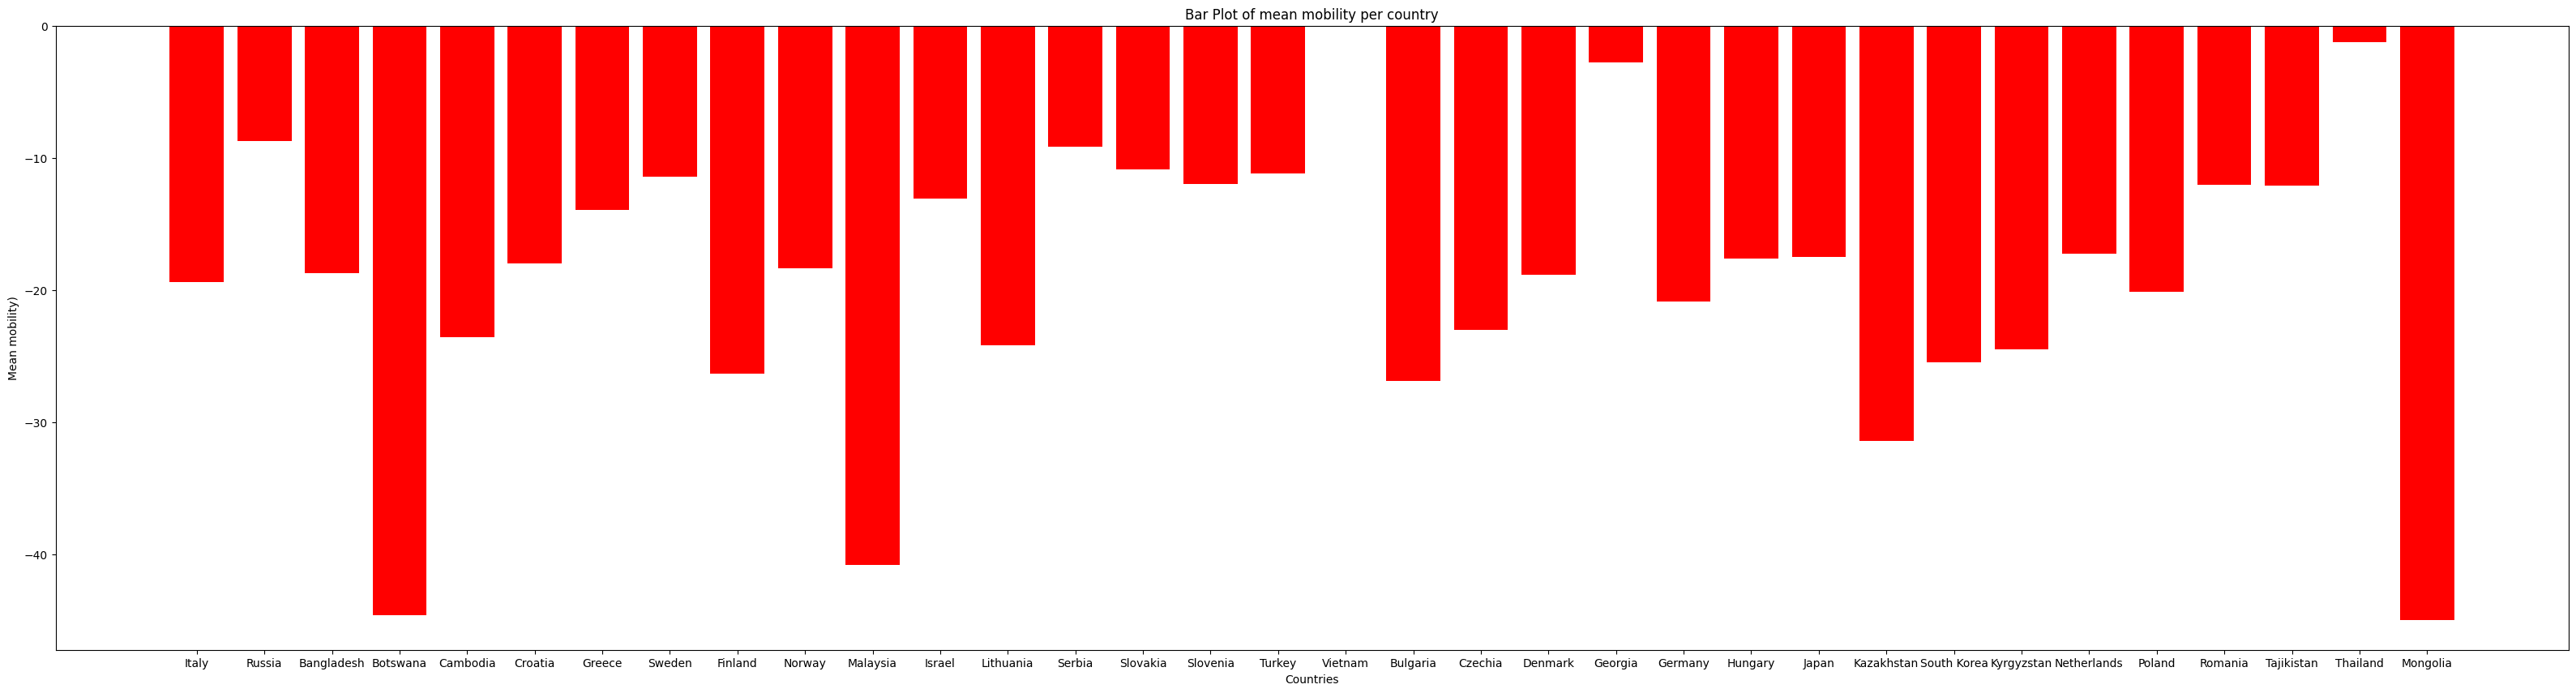

In [83]:
# x = []
# y = []
# for column in mobility_countries:
#     x.append(mobility_countries[column].values)
#     y.append(column)

mobility_countriesT = mobility_countries.transpose()
mobility_countriesT = mobility_countriesT.drop(index= "mobility", axis=0)
mobility_countriesT = mobility_countriesT.rename(columns= {0: 'mean mobility:'})
# create a new figure
plt.figure(figsize=(40, 10))

# use the scatter() function to plot the points,
# with red circles of size 10
plt.bar(mobility_countriesT.index.values, mobility_countriesT['mean mobility:'].values, color="red")

# add a title
plt.title("Bar Plot of mean mobility per country")

# add x and y axis labels
plt.xlabel("Countries")
plt.ylabel("Mean mobility)")

# show the plot
plt.show()